### WebGL online

In [1]:
# General imports
import os
import sys
import numpy as np
import json
import copy
import cortex
import matplotlib.pyplot as plt

# Personal imports
sys.path.append("{}/../../../../utils".format(os.getcwd()))
from pycortex_utils import draw_cortex, set_pycortex_config_file, load_surface_pycortex, create_colormap

# Inputs
# main_dir = '/home/mszinte/disks/meso_S/data'
main_dir = '/Users/martinszinte/disks/meso_S/data/'
project_dir = 'amblyo_prf'
subject = 'sub-01'
save_svg = False

# Define analysis parameters
with open('../../../../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)
if subject == 'sub-170k': formats = ['170k']
else: formats = analysis_info['formats']
extensions = analysis_info['extensions']
prf_task_name = analysis_info['prf_task_name']

# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)

# Define/create colormap
colormap_name = 'rois_colors'
colormap_dict = {'n/a': (0, 0, 0),
                 'V1': (243, 231, 155),
                 'V2': (250, 196, 132),
                 'V3': (248, 160, 126),
                 'V3AB': (235, 127, 134),
                 'LO': (150, 0, 90), 
                 'VO': (0, 0, 200),
                 'hMT+': (0, 25, 255),
                 'iIPS': (0, 152, 255),
                 'sIPS': (44, 255, 150)}
create_colormap(cortex_dir=cortex_dir, 
                colormap_name=colormap_name, 
                colormap_dict=colormap_dict,
                recreate=True
               )

Saving new colormap: /Users/martinszinte/disks/meso_S/data//amblyo_prf/derivatives/pp_data/cortex/colormaps/rois_colors.png


Creating flatmaps...


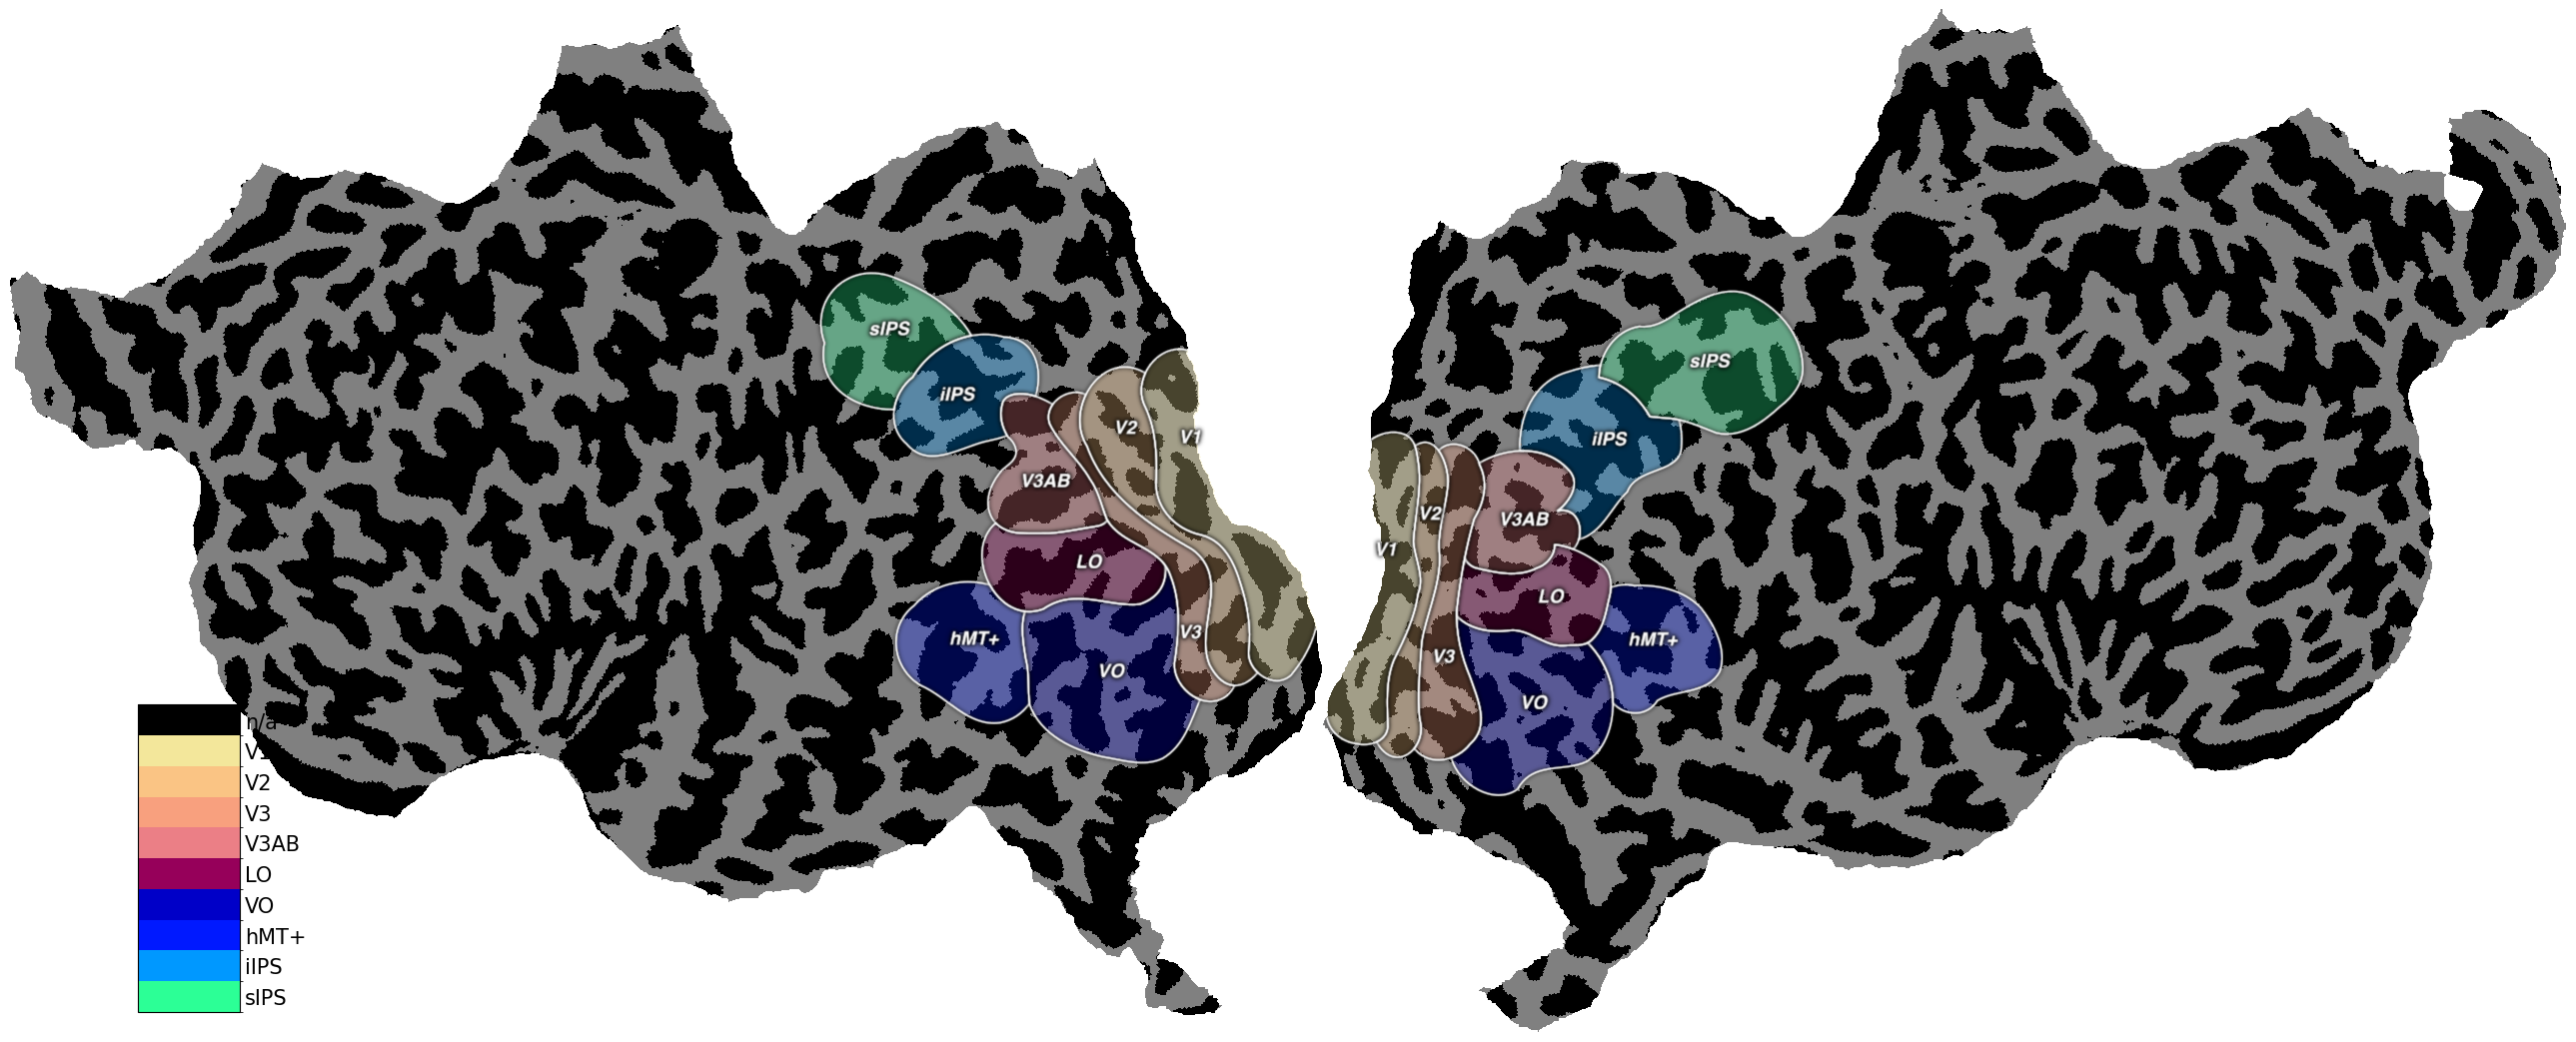

In [2]:
# Create flatmaps
formats = ['fsnative']
for format_, pycortex_subject in zip(formats, [subject, 'sub-170k']):
    # Define directories and fn
    rois_dir = "{}/{}/derivatives/pp_data/{}/{}/rois".format(main_dir, project_dir, subject,format_)
    flatmaps_dir = '{}/pycortex/flatmaps_rois'.format(rois_dir)
    datasets_dir = '{}/pycortex/datasets_rois'.format(rois_dir)
    
    os.makedirs(flatmaps_dir, exist_ok=True)
    os.makedirs(datasets_dir, exist_ok=True)
    
    if format_ == 'fsnative':
        roi_fn_L = '{}/{}_hemi-L_rois.func.gii'.format(rois_dir, subject)
        roi_fn_R = '{}/{}_hemi-R_rois.func.gii'.format(rois_dir, subject)
        results = load_surface_pycortex(L_fn=roi_fn_L, 
                                        R_fn=roi_fn_R)
        roi_mat = results['data_concat']
        
    elif format_ == '170k':
        roi_fn = '{}/{}_rois.dtseries.nii'.format(rois_dir, subject)
        results = load_surface_pycortex(brain_fn=roi_fn)
        roi_mat = results['data_concat']

    rois_opacity = 0.3
    alpha_mat = copy.copy(roi_mat)
    alpha_mat = alpha_mat*0+rois_opacity
    alpha_mat[roi_mat==0]=0
    print('Creating flatmaps...')

    # rois
    roi_name = '{}_rois'.format(prf_task_name)
    param_rois = {'subject': pycortex_subject,
                  'data': roi_mat,
                  'cmap': colormap_name,
                  'alpha': alpha_mat,
                  'cbar': 'discrete_personalized', 
                  'vmin': 0,
                  'vmax': 9,
                  'cmap_steps': len(colormap_dict),
                  'cmap_dict': colormap_dict,
                  'cortex_type': 'VertexRGB',
                  'description': 'Gaussian pRF ROIs',
                  'curv_brightness': 0, 
                  'curv_contrast': 1,
                  'add_roi': save_svg,
                  'with_labels': True,
                  'roi_name': roi_name}
                  
    # draw flatmaps
    volume_roi = draw_cortex(**param_rois)

In [4]:
# Webgl for inflated brain pictures
handle = cortex.webgl.show(data=volume_roi, 
                           recache=False,
                          )

Started server on port 58084


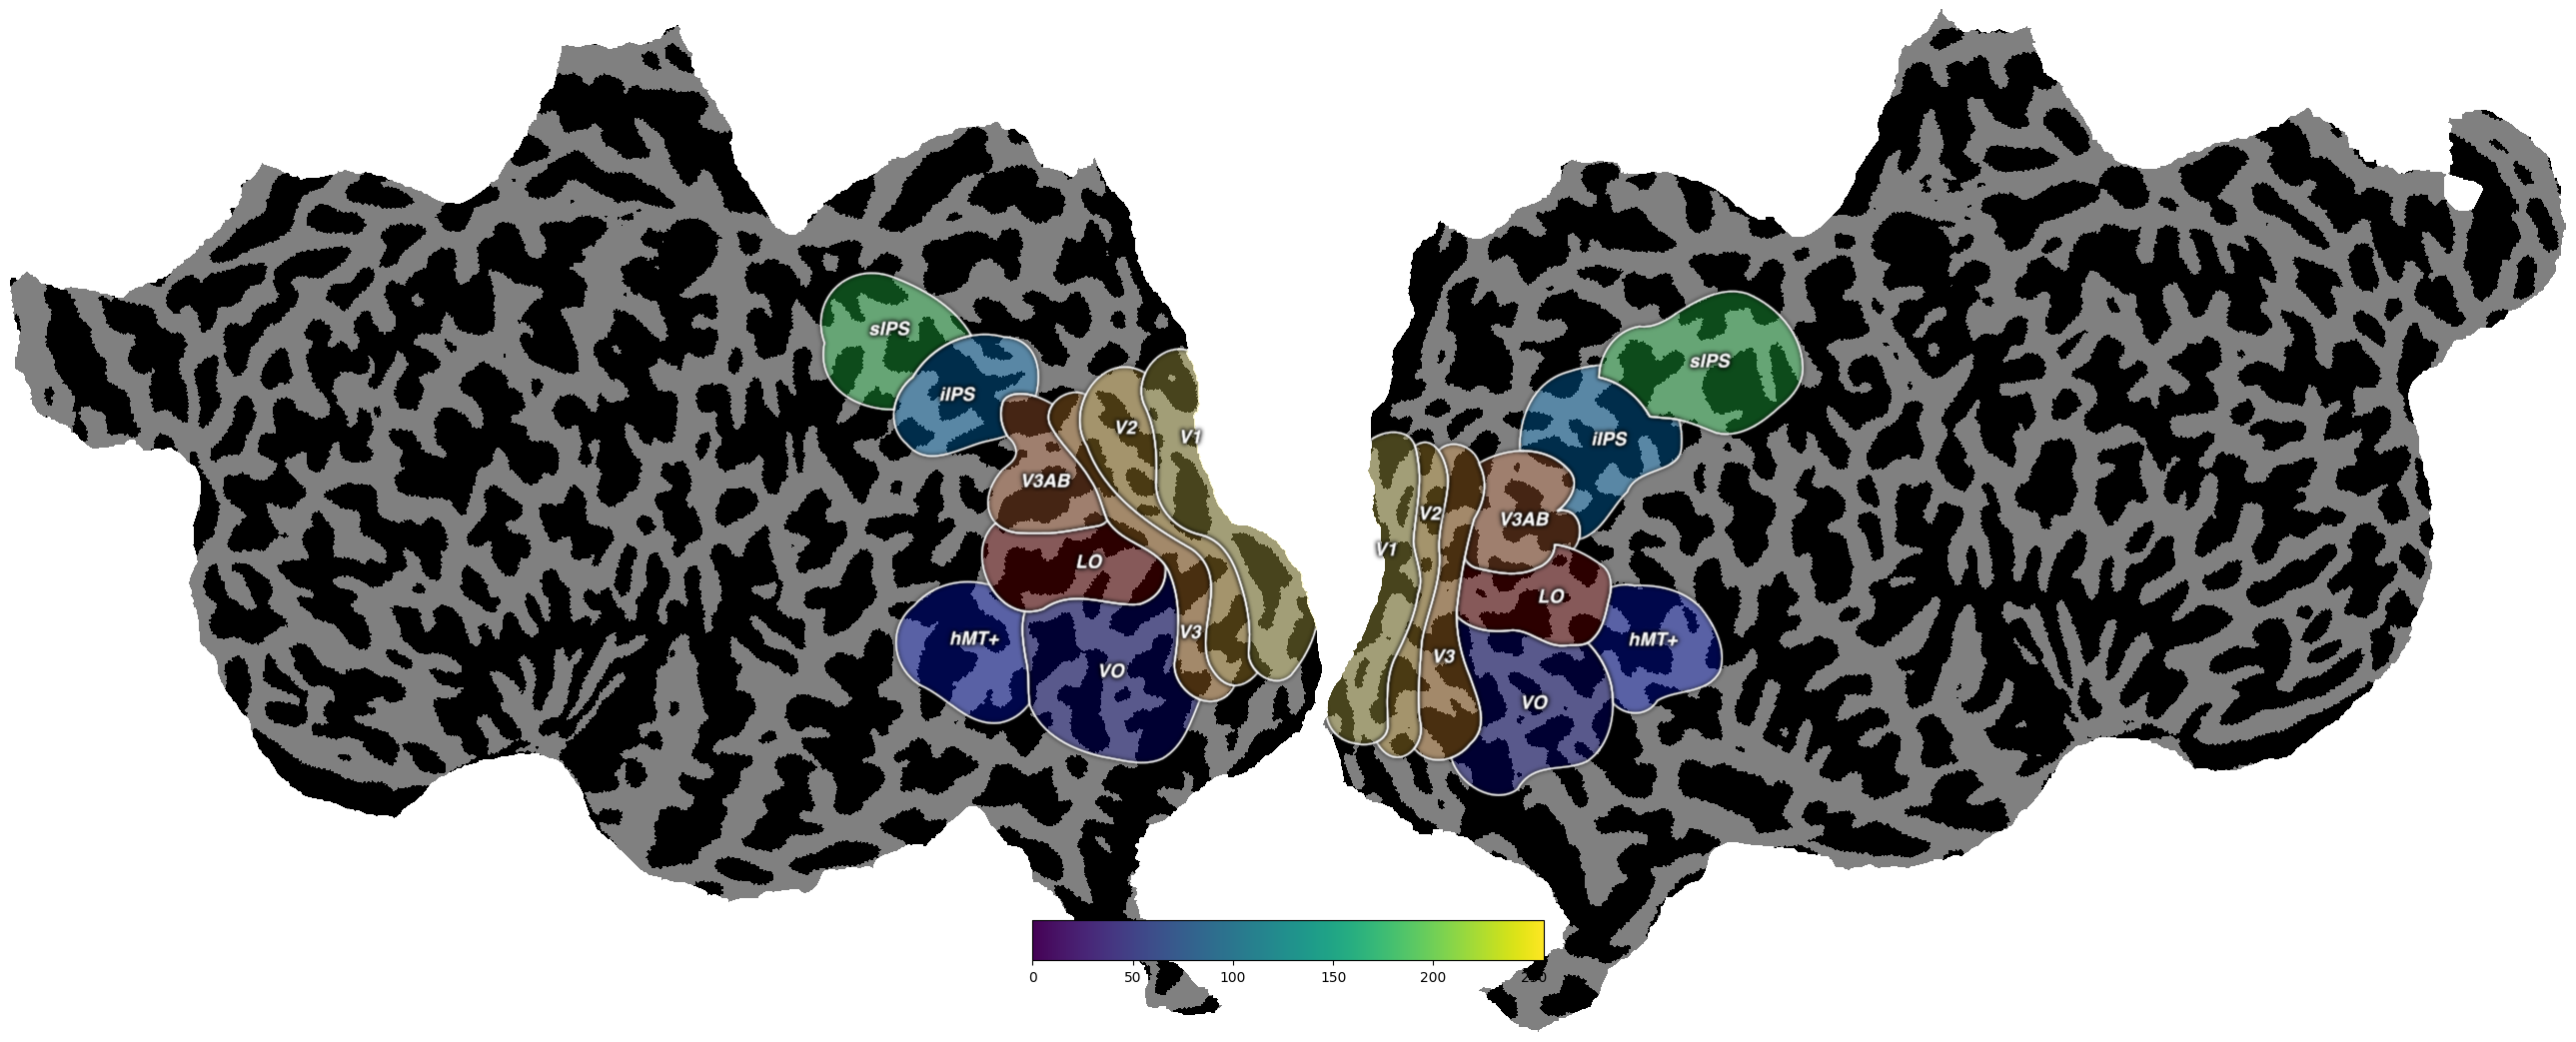

In [ ]:
# # convert data to RGB
# vmax = 9
# vmin = 0
# cmap_steps = len(colormap_dict) 
# data = roi_mat
# alpha = alpha_mat
# cmap = colormap_name

# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# try: base = plt.cm.get_cmap(cmap)
# except: base = cortex.utils.get_cmap(cmap)
# if '_alpha' in cmap: base.colors = base.colors[1,:,:]
# val = np.linspace(0, 1, cmap_steps+1, endpoint=False)
# colmap = colors.LinearSegmentedColormap.from_list('my_colmap', base(val), N=cmap_steps)

# # compute
# vrange = float(vmax) - float(vmin)
# norm_data = ((data-float(vmin))/vrange)*cmap_steps
# mat = colmap(norm_data.astype(int))*255.0
# alpha = alpha*255.0

# # define Vertex RGB
# braindata = cortex.VertexRGB( red = mat[...,0],
#                               green = mat[...,1],
#                               blue = mat[...,2],
#                               subject = subject,
#                               alpha = alpha.astype(np.uint8))
# braindata_fig = cortex.quickshow(braindata=braindata,
#                                  depth=1,
#                                  thick=1,
#                                  height=1024,
#                                  #sampler='nearest',
#                                  with_curvature=True,
#                                  #nanmean=True,
#                                  # with_labels = with_labels,
#                                  # with_colorbar = with_colorbar,
#                                  # with_borders = with_borders,
#                                  curvature_brightness = 0,
#                                  curvature_contrast = 1
#                                 )

In [ ]:
# # Webgl for inflated brain pictures
# handle = cortex.webgl.show(data=volume_roi, 
#                            recache=False,
#                            types=('inflated',)
#                           )

Started server on port 43684


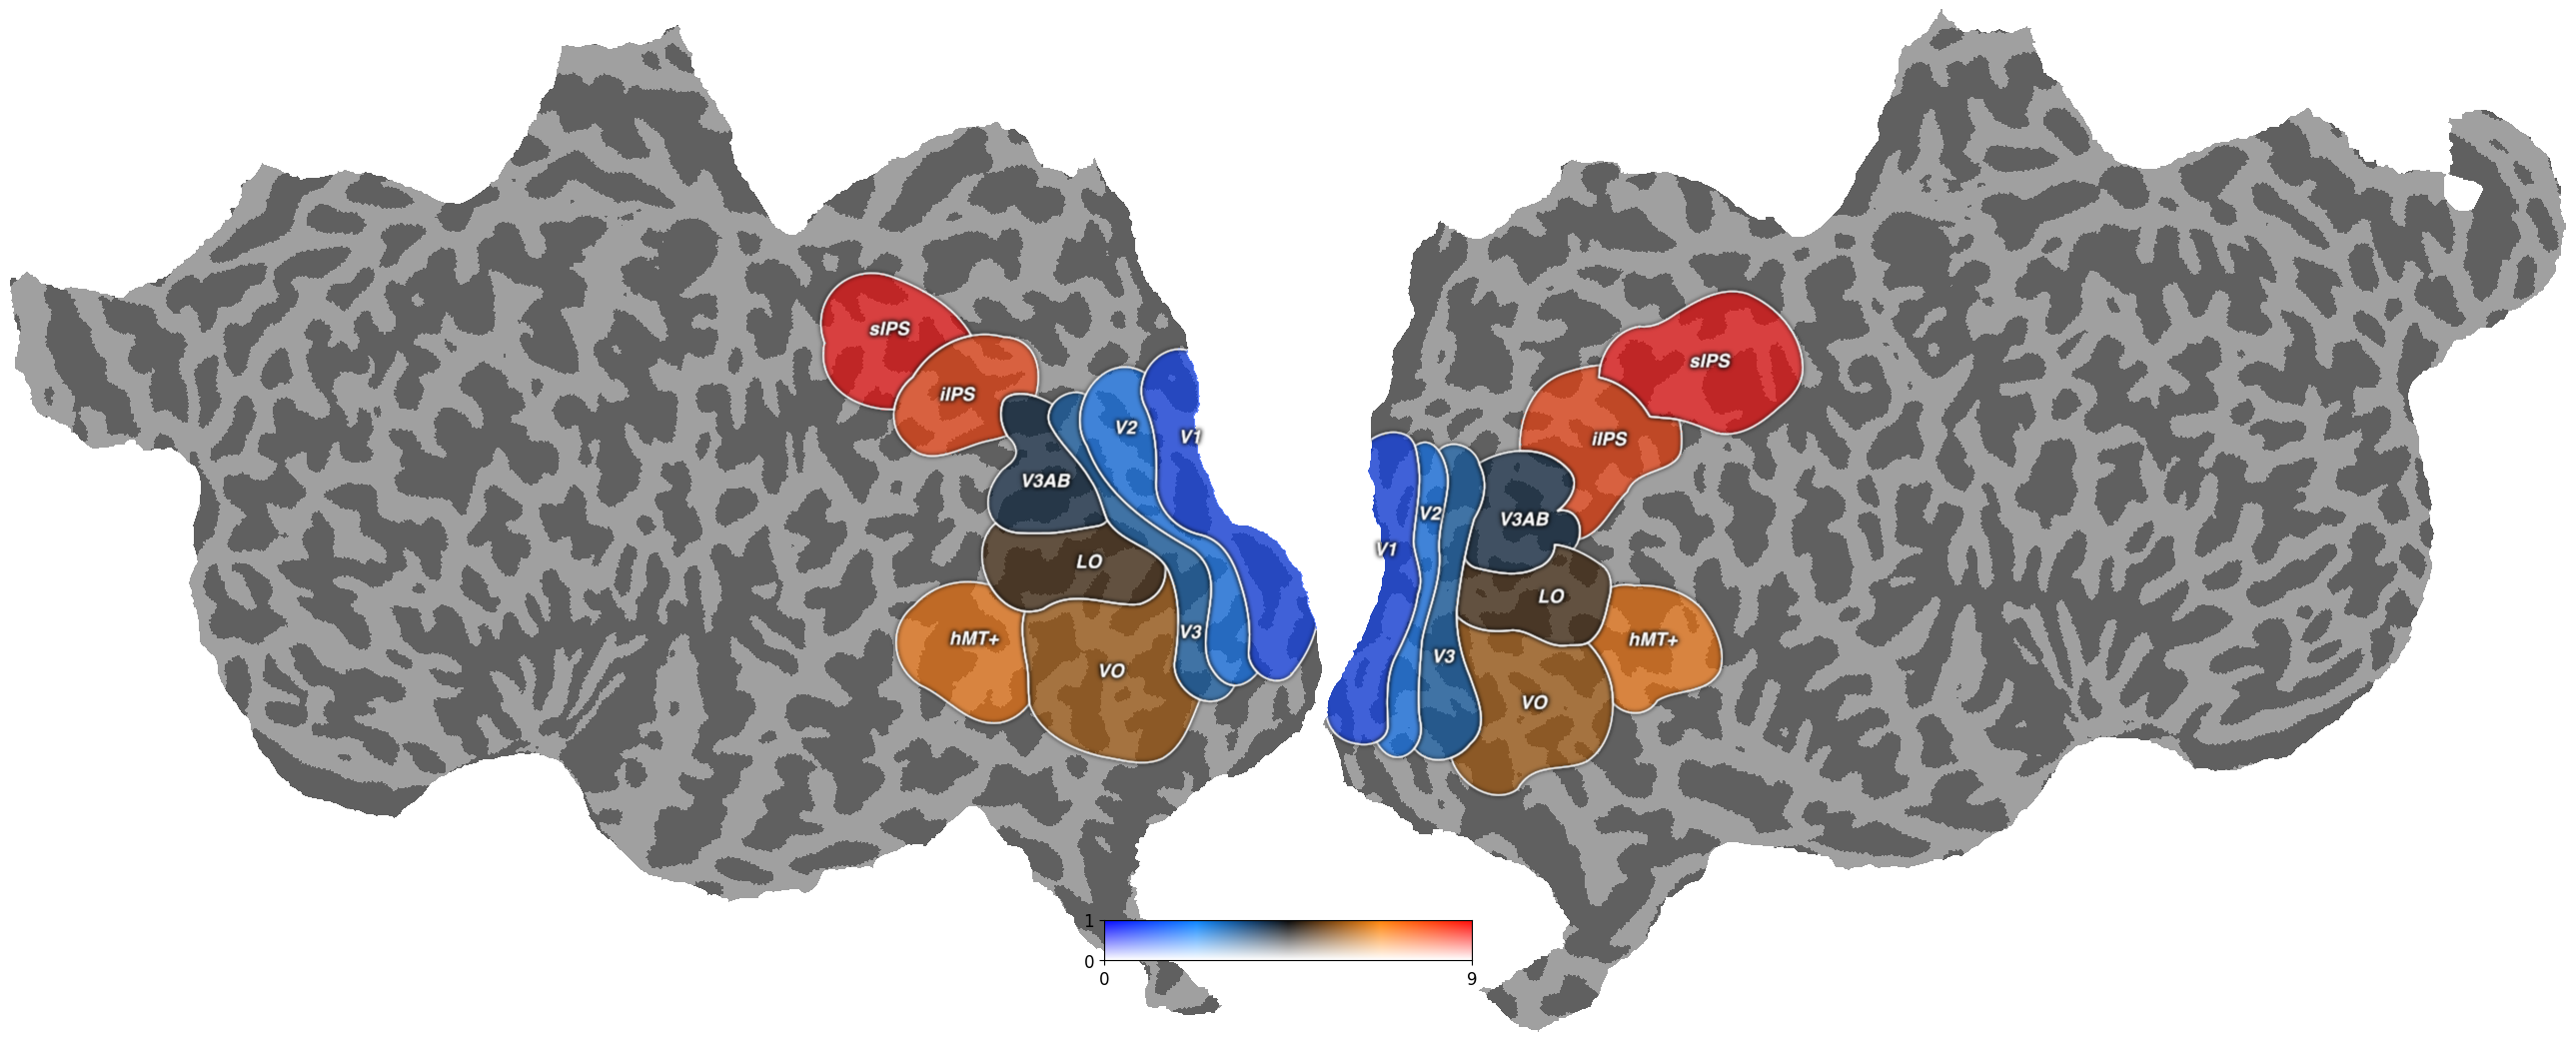

In [ ]:
# braindata = cortex.Vertex2D(subject=subject,
#                             dim1=data,
#                             dim2=alpha_mat*1.2,
#                             vmin=0,
#                             vmax=9,
#                             vmin2=0,
#                             vmax2=1,
#                             cmap='BuBkRd_alpha_2D')
# braindata_fig = cortex.quickshow(braindata=braindata,
#                                  #depth=1,
#                                  #thick=1,
#                                  height=1024,
#                                  #sampler='nearest',
#                                  with_curvature=True,
#                                  nanmean=True,
#                                  # with_labels = with_labels,
#                                  # with_colorbar = with_colorbar,
#                                  # with_borders = with_borders,
#                                  #curvature_brightness = 0,
#                                  #curvature_contrast = 1
#                                 )

In [ ]:
# # Webgl for inflated brain pictures
# handle = cortex.webgl.show(data=braindata, 
#                            recache=False,
#                            types=('inflated',)
#                           )

Started server on port 28763
Stopping server
